In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [48]:
# Load the dataset
file_path = ('https://raw.githubusercontent.com/UninspiredNomenclature/project_4/refs/heads/aaron_w/winequality-red.csv')
wine_df = pd.read_csv(file_path)

# Display the first few rows to confirm data is loaded
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


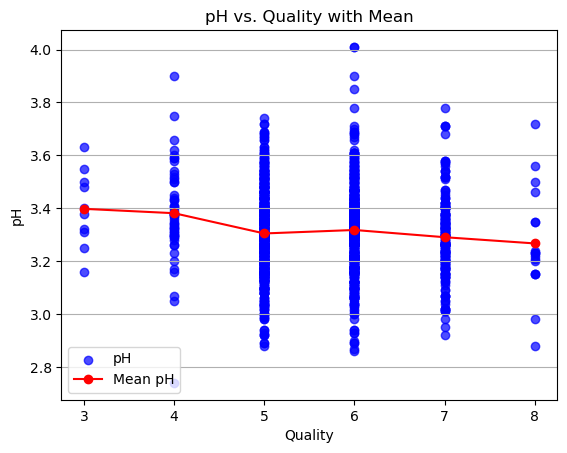

quality
3    3.398000
4    3.381509
5    3.304949
6    3.318072
7    3.290754
8    3.267222
Name: pH, dtype: float64


In [ ]:
# Extract pH and quality values
pH_values = wine_df["pH"]
quality_values = wine_df["quality"]

# Calculate avg for each quality
mean_pH = wine_df.groupby('quality')['pH'].mean()

# Scatter plot of all pH vs. quality
plt.scatter(quality_values, pH_values, color='blue', label='pH', alpha=0.7)

# Overlay mean, median, and mode as lines
plt.plot(mean_pH.index, mean_pH, label='Mean pH', color='red', marker='o')

# Add labels, title, and legend
plt.title("pH vs. Quality with Mean")
plt.xlabel("Quality")
plt.ylabel("pH")
plt.legend(loc="lower left")
plt.grid(axis = "y")

# Save the plot as wine_density_means.png
plt.savefig('wine_pH_means.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
print(mean_pH)

In [50]:
# Select pH column as features
X = wine_df[['pH']]

# Define the target variable
y = wine_df['quality']

In [51]:
# Initialize SMOTE
smote = SMOTE(random_state=0)

# Apply SMOTE to balance the dataset
X_res, y_res = smote.fit_resample(X, y)

In [52]:
# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0)


In [53]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing set
X_test_scaled = scaler.transform(X_test)

In [54]:
# Initialize the Logistic Regression model
lr = LogisticRegression()

# Train the Logistic Regression model
lr.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_lr = lr.predict(X_test_scaled)

# Calculate the accuracy score
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")

Logistic Regression Accuracy: 0.24


In [55]:
# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier()

# Train the Decision Tree Classifier
dt.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_dt = dt.predict(X_test_scaled)

# Calculate the accuracy score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

Decision Tree Accuracy: 0.42


In [56]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Train the Random Forest Classifier
rf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test_scaled)

# Calculate the accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

Random Forest Accuracy: 0.41


In [57]:
# Filter high-quality predictions
high_quality_indices = [i for i, pred in enumerate(y_pred_rf) if pred == 8]
high_quality_wines = X_test.iloc[high_quality_indices]

# Display the mean values of pH level for high-quality predictions
print("Optimal pH Levels for High-Quality Wine:")
print(high_quality_wines.mean())

Optimal pH Levels for High-Quality Wine:
pH    3.256804
dtype: float64


In [58]:
#pH is not a good predictor
#potentially get rid of data from 3-4...
#anything else is essentially manipulating data vs. and overstates significance is what matters
#ML can't work off lack of pattern